In [296]:
import pandas as pd
import numpy  as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib as plot
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [236]:
#load dataset
df_training = pd.read_csv('../input/projeto4_telecom_treino.csv')
df_training = df_training.iloc[:,1:]
df_training.shape

(3333, 20)

In [237]:
#checking data types
df_training.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [197]:
#visualizing first 5 observations
df_training.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [198]:
#describing variables
df_training.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,area_code_415,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,106,NaN,1655,3010,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [199]:
area_code_f, area_code_idx = pd.factorize(df_training['area_code'])
international_plan_f, international_plan_idx = pd.factorize(df_training['international_plan'])
state_f, state_idx = pd.factorize(df_training['state'])
voice_mail_plan_f, voice_mail_plan_idx = pd.factorize(df_training['voice_mail_plan'])
churn_f, churn_idx = pd.factorize(df_training['churn'])

In [200]:
churn_idx

Index(['no', 'yes'], dtype='object')

In [201]:
df_training_factorize= df_training

In [202]:
df_training_factorize['area_code'] = area_code_f
df_training_factorize['international_plan'] = international_plan_f
df_training_factorize['state']=state_f
df_training_factorize['voice_mail_plan']=voice_mail_plan_f
df_training_factorize['churn']=churn_f


In [219]:
df_training_factorize.shape

(3333, 20)

In [203]:
df_training_factorize.describe(include='all')

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,24.269127,101.064806,0.755476,0.096910,0.723372,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,14.736558,39.822106,0.830054,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,74.000000,0.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,24.000000,101.000000,1.000000,0.000000,1.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,37.000000,127.000000,2.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,50.000000,243.000000,2.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [204]:
#target variable distribution
df_training_factorize.groupby('churn').size( )

churn
0    2850
1     483
dtype: int64

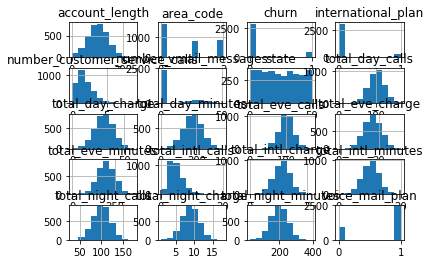

In [205]:
_=df_training_factorize.hist()

In [423]:
#S

X0=df_training_factorize.iloc[:,:-1].values
y0=df_training_factorize.iloc[:,-1:].values.ravel()

In [424]:
y0

array([0, 0, 0, ..., 0, 0, 0])

In [425]:
#Feature selection

model = ExtraTreesClassifier()
model.fit(X0,y0)


features=pd.DataFrame(df_training_factorize.iloc[:,:-1].columns.values.ravel(), columns=['Feature'])
features['Score']=pd.DataFrame(model.feature_importances_)
features.sort_values('Score')

,Feature,Score
5,number_vmail_messages,0.015658
4,voice_mail_plan,0.017869
2,area_code,0.022991
10,total_eve_calls,0.032457
13,total_night_calls,0.033149
1,account_length,0.034729
7,total_day_calls,0.035371
0,state,0.035507
12,total_night_minutes,0.037920
14,total_night_charge,0.040238


In [426]:
 X0 = df_training_factorize[['total_day_minutes','number_customer_service_calls','total_day_charge']].values

In [427]:
# Setting number of folders
nu_folds = 12
nu_instances = len(X0)
seed = 987

In [428]:
#Split dataset into Kfold
kfold = KFold(n_splits=nu_instances, random_state=seed)

In [429]:
# Fit model
model = LogisticRegression()

In [430]:
result = cross_val_score(model, X0, y0, cv=kfold)

In [431]:
print(result)
print("Accurary", result.mean())


[1. 1. 1. ... 1. 1. 1.]
Accurary 0.8532853285328533


In [433]:
model.fit(X0,y0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [395]:
#load dataset
df_test = pd.read_csv('../input/projeto4_telecom_teste.csv')
df_test.shape

(1667, 21)

In [396]:
area_code_f, area_code_idx = pd.factorize(df_test['area_code'])
international_plan_f, international_plan_idx = pd.factorize(df_test['international_plan'])
state_f, state_idx = pd.factorize(df_test['state'])
voice_mail_plan_f, voice_mail_plan_idx = pd.factorize(df_test['voice_mail_plan'])
churn_f, churn_idx = pd.factorize(df_test['churn'])


df_test_factorize= df_test


df_test_factorize['area_code'] = area_code_f
df_test_factorize['international_plan'] = international_plan_f
df_test_factorize['state']=state_f
df_test_factorize['voice_mail_plan']=voice_mail_plan_f
df_test_factorize['churn']=churn_f

In [397]:
#target variable distribution
df_test_factorize.groupby('churn').size( )

churn
0    1443
1     224
dtype: int64

In [398]:
df_test_factorize.set_index('Unnamed: 0', inplace=True, drop=True)

In [399]:
df_test_factorize.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
1,0,101,0,0,0,0,70.9,123,12.05,211.9,73,18.01,236.0,73,10.62,10.6,3,2.86,3,0
2,1,137,0,0,0,0,223.6,86,38.01,244.8,139,20.81,94.2,81,4.24,9.5,7,2.57,0,0
3,2,103,1,0,1,29,294.7,95,50.10,237.3,105,20.17,300.3,127,13.51,13.7,6,3.70,1,0
4,3,99,2,0,0,0,216.8,123,36.86,126.4,88,10.74,220.6,82,9.93,15.7,2,4.24,1,0
5,4,108,2,0,0,0,197.4,78,33.56,124.0,101,10.54,204.5,107,9.20,7.7,4,2.08,2,0


In [450]:
 X0_test = df_test_factorize[['total_day_minutes','number_customer_service_calls','total_day_charge']].values

In [458]:
#Separating Independent and Dependent variables
array = df_test_factorize.values
y0_test=array[:, -1:]
y0_test.shape

(1667, 1)

In [459]:
#Model Score
model.score(X0_test,y0_test)   

0.8662267546490702

In [460]:
#Model predict
model.predict(X0_test) 

array([0, 0, 0, ..., 0, 0, 0])

In [462]:
#Model probability
pd.DataFrame(model.predict_proba(X0_test),columns=["NO","Yes"]).query('Yes>=0.6')

,NO,Yes
322,0.318987,0.681013
359,0.389292,0.610708
974,0.162051,0.837949
982,0.361729,0.638271
1013,0.375929,0.624071
1073,0.300488,0.699512
1354,0.384560,0.615440
1586,0.190493,0.809507
